In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.sparse import issparse

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.5 pynndescent==0.5.10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [ ]:
results_file = 'write/CoreAnalyzedData.h5ad'

In [2]:
adata = sc.read_h5ad('local.h5ad')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 584944 × 28024
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [ ]:
adata_t_cells.var_names_make_unique()
adata_t_cells

In [ ]:
metadata = pd.DataFrame({
    'Donor ID': adata.obs['donor_id'],
    'Age': adata.obs['age_or_mean_of_age_range'],
    'Sex': adata.obs['sex'],
    'BMI': adata.obs['BMI'],
    'Cause of Death': adata.obs['cause_of_death'],
    'Mixed Ancestry': adata.obs['mixed_ancestry'],
    'Smoking Status': adata.obs['smoking_status'],
    'Self-Reported Ethnicity': adata.obs['self_reported_ethnicity_ontology_term_id'],
    'Lung Condition' : adata.obs['lung_condition']
})

metadata.to_csv("coremetadata.csv", index=False)

In [ ]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [ ]:
plt.hist(adata.obs['n_genes_by_counts'], bins=50)
plt.xlabel('Number of genes')
plt.ylabel('Number of cells')
plt.title('Number of genes per cell')
plt.show()

In [ ]:
sc.pl.violin(adata, 'n_genes_by_counts')

In [ ]:
num_genes_per_cell = (adata.X > 0).sum(axis=1)

# Create a histogram
plt.hist(num_genes_per_cell, bins=30)
plt.xlabel('Number of genes')
plt.ylabel('Number of cells')
plt.show()

In [ ]:
import seaborn as sns

# Calculate the number of genes (non-zero entries) for each cell
num_genes_per_cell = np.sum(adata.X > 0, axis=1)

# Calculate log2 of the number of genes, adding a small constant to avoid log2(0)
log_num_genes_per_cell = np.log2(num_genes_per_cell + 1)

# Create a violin plot
sns.violinplot(y=log_num_genes_per_cell)
plt.title('Log2 of # Genes per Cell')
plt.show()

In [ ]:
# Total count (UMI) per cell
total_counts_per_cell = np.sum(adata.X, axis=1)

# Create a violin plot
sns.violinplot(x=total_counts_per_cell)
plt.xlabel('Total UMIs per cell')
plt.title('UMI Plot')
plt.show()

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
adata.var['mt'] = adata.var_names.str.startswith('mt-')

num_mt_genes = adata.var['mt'].sum()
print("Number of mitochondrial genes:", num_mt_genes)

"""
mito_counts_per_cell = np.sum(adata.X[:, adata.var['mt']], axis=1)

# Percentage of counts that are mitochondrial
percentage_mito = mito_counts_per_cell / total_counts_per_cell * 100

# Create a violin plot
sns.violinplot(x=percentage_mito)
plt.xlabel('Percentage of mitochondrial counts')
plt.show()
"""

In [ ]:
print("Total number of genes: ", adata.var_names.shape[0])

# Print the gene names
print("Gene names: ", adata.var_names)

In [ ]:
# Convert the gene names to a list and then a DataFrame
gene_names_df = pd.DataFrame(adata.var_names.tolist(), columns=['Gene Names'])

# Save the DataFrame to a CSV file
gene_names_df.to_csv('gene_names.csv', index=False)

In [ ]:
# Compute the counts for the mitochondrial genes
mito_counts = adata[:, adata.var["mt"].values].X.sum(axis=1)

# Compute the total counts per cell
total_counts = adata.X.sum(axis=1)

# Calculate the percentage of counts in mitochondrial genes
adata.obs['percent_mito'] = mito_counts / total_counts * 100

# You may also want to log transform the total counts
adata.obs['log_counts'] = np.log(total_counts + 1)  # Adding 1 to avoid log(0)

print(adata.obs)

In [ ]:
import seaborn as sns

# Violin plot of the percentage of mitochondrial genes
plt.figure(figsize=(10,5))
sns.violinplot(y=adata.obs['percent_mito'])
plt.title('% Mito Genes')
plt.show()

In [ ]:
print(adata.var)

In [ ]:
adata.layers["raw"] = adata.X.copy()  # preserve the raw counts
sc.pp.normalize_total(adata, target_sum=1e4)  # normalize the counts
sc.pp.log1p(adata)  # log transform
adata.raw = adata  # keep the normalized and log transformed data

In [ ]:
num_cells_raw = adata.layers["raw"].shape[0]
print(f"Number of cells in raw counts: {num_cells_raw}")

# In normalized counts
num_cells_norm = adata.X.shape[0]
print(f"Number of cells in normalized counts: {num_cells_norm}")

In [ ]:
num_genes_expressed = np.sum(adata.X > 0, axis=1)

# Find the minimum number of expressed genes in any cell
min_num_genes_expressed = np.min(num_genes_expressed)

print(f"Minimum number of genes expressed in any cell: {min_num_genes_expressed}")

In [ ]:
print(adata.obs_names)
print(adata.var_names)

In [ ]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
#  sc.pp.log1p(adata) apparently already done??? || check article

In [ ]:
np.any(np.isnan(adata.X.toarray())), np.any(np.isinf(adata.X.toarray()))

In [ ]:
print('Max value:', adata.X.data.max())
print('Min value:', adata.X.data.min())

In [ ]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
print(adata.obs['total_counts'].isna().sum())
print(adata.obs['percent_mito'].isna().sum())
print(np.isinf(adata.obs['total_counts']).sum())
print(np.isinf(adata.obs['percent_mito']).sum())
# sc.pp.regress_out(adata, ['total_counts', 'percent_mito'])

In [ ]:
adata.obs['percent_mito'] = (np.sum(
    adata[:, adata.var['mt'].values].X, axis=1).flatten() / np.sum(adata.X, axis=1).flatten()) * 100

In [ ]:
print(adata.obs['total_counts'].isna().sum())
print(adata.obs['percent_mito'].isna().sum())
print(np.isinf(adata.obs['total_counts']).sum())
print(np.isinf(adata.obs['percent_mito']).sum())

In [ ]:
# Calculate counts for mitochondrial genes and convert to numpy array
mito_counts = np.asarray(adata[:, adata.var['mt'].values].X.sum(axis=1)).squeeze()

# Calculate total counts and convert to numpy array
total_counts = np.asarray(adata.X.sum(axis=1)).squeeze()

# Calculate the percentage and assign to the dataframe
adata.obs['percent_mito'] = (mito_counts / total_counts) * 100

In [ ]:
max_mito_percent = adata.obs['percent_mito'].max()
print("Maximum percent of mitochondrial counts: ", max_mito_percent)

In [ ]:
adata

In [ ]:
print(adata.obs.columns)

In [ ]:
print(adata.obs['cell_type'].unique())

In [ ]:

cell_type_sex_breakdown = adata.obs.groupby(['cell_type', 'sex', 'ann_level_2']).size()
cell_type_sex_breakdown.to_csv('cell_type_sex_breakdown.csv')

In [ ]:
celltypes_by_age = adata.obs.groupby('age_range')['cell_type'].value_counts()
print(celltypes_by_age)
celltypes_by_age.to_csv('celltypes_by_age.csv')

In [ ]:
cell_type_study_breakdown = adata.obs.groupby(['cell_type']).size()
print(cell_type_study_breakdown)
cell_type_study_breakdown.to_csv('celltypes_by_breakdown.csv')

In [ ]:
print(list(adata.obs['cause_of_death'].unique()))

In [ ]:
adata

In [ ]:
cell_type_sex_level_breakdown = adata.obs.groupby(['cell_type', 'sex', 'ann_level_4']).size()
cell_type_sex_level_breakdown.to_csv('cell_type_sex_level4_breakdown.csv')

In [ ]:
t_cells = adata[adata.obs['cell_type'].isin(['T-cells', 'CD4 T-cells', 'CD8 T-cells'])]

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
adata.write('results_file.h5ad')

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

In [ ]:
sc.tl.umap(adata)

In [ ]:
cell_type_breakdown_level15 = adata.obs.groupby(['cell_type', 'ann_level_1', 'ann_level_5']).size()
cell_type_breakdown_level15.to_csv('cell_type_breakdown_level15.csv')

In [ ]:
immune_cell_subsets = adata.obs.loc[adata.obs['ann_level_1'] == 'immune']
num_unique_immune_cell_subsets = len(unique_immune_cell_subsets)

print(f"There are {num_unique_immune_cell_subsets} unique immune cell subsets at level 5.")

In [ ]:
df = pd.read_csv('cell_type_breakdown_level15.csv')

# Subset dataframe to include only rows where 'ann_level_1' is 'immune'
immune_cells_df = df[df['ann_level_1'] == 'Immune']

# Get unique 'ann_level_5' values for 'immune' cells

unique_immune_cells_level_5 = immune_cells_df['ann_level_5'].unique()

# Get the number of unique 'immune' cell types at level 5
num_unique_immune_cells_level_5 = len(unique_immune_cells_level_5)

print(f"There are {num_unique_immune_cells_level_5} unique 'immune' cell types at level 5.")
print(unique_immune_cells_level_5)

In [ ]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, 'cell_type', method='wilcoxon')

# Print the top 20 marker genes for each group
sc.pl.rank_genes_groups(adata, n_genes=20)

In [ ]:
adata_tcells = adata[adata.obs['cell_type'] == 'T cell']

# Plot UMAP
sc.pl.umap(adata_tcells, color='cell_type')

plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(adata.obs['cell_type'].unique())

In [ ]:
print(list(adata.obs['cell_type'].unique()))

In [ ]:
adata_t_cells = adata[adata.obs['cell_type'].isin(['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell'])]

In [ ]:
print(adata_t_cells)

In [ ]:
sc.pl.umap(adata_t_cells, color='cell_type')
plt.show()

In [ ]:
for level in ['ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5']:
    sc.pl.umap(adata_t_cells, color=level)

In [ ]:
pd.set_option('display.max_rows', None)
ann_level1_counts_t_cells = adata.obs.groupby('ann_level_1')['cell_type'].count()
ann_level2_counts_t_cells = adata.obs.groupby('ann_level_2')['cell_type'].count()
ann_level3_counts_t_cells = adata.obs.groupby('ann_level_3')['cell_type'].count()
ann_level4_counts_t_cells = adata.obs.groupby('ann_level_4')['cell_type'].count()
ann_level5_counts_t_cells = adata.obs.groupby('ann_level_5')['cell_type'].count()


print("Level 1 counts: \n", list(ann_level1_counts_t_cells.items()))
print("Level 2 counts: \n", list(ann_level2_counts_t_cells.items()))
print("Level 3 counts: \n", list(ann_level3_counts_t_cells.items()))
print("Level 4 counts: \n", list(ann_level4_counts_t_cells.items()))
print("Level 5 counts: \n", list(ann_level5_counts_t_cells.items()))

In [ ]:

# Create a DataFrame from the Series objects
df_t_cells_counts = pd.DataFrame({
    'Level_1_counts': ann_level1_counts_t_cells,
    'Level_2_counts': ann_level2_counts_t_cells,
    'Level_3_counts': ann_level3_counts_t_cells,
    'Level_4_counts': ann_level4_counts_t_cells,
    'Level_5_counts': ann_level5_counts_t_cells,
})

# Fill NaN values with 0, as NaNs might occur where a certain annotation doesn't exist at a certain level
df_t_cells_counts = df_t_cells_counts.fillna(0)

# Write the DataFrame to a CSV file
df_t_cells_counts.to_csv('t_cells_counts.csv')

In [ ]:
df_level1 = ann_level1_counts_t_cells.reset_index().rename(columns={'cell_type': 'Counts'})
df_level1['Level'] = 'Level 1'

df_level2 = ann_level2_counts_t_cells.reset_index().rename(columns={'cell_type': 'Counts'})
df_level2['Level'] = 'Level 2'

df_level3 = ann_level3_counts_t_cells.reset_index().rename(columns={'cell_type': 'Counts'})
df_level3['Level'] = 'Level 3'

df_level4 = ann_level4_counts_t_cells.reset_index().rename(columns={'cell_type': 'Counts'})
df_level4['Level'] = 'Level 4'

df_level5 = ann_level5_counts_t_cells.reset_index().rename(columns={'cell_type': 'Counts'})
df_level5['Level'] = 'Level 5'

# Concatenate all dataframes
df_all_levels = pd.concat([df_level1, df_level2, df_level3, df_level4, df_level5])

# Print the concatenated dataframe
print(df_all_levels)

In [ ]:
ann_level1_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_1']).size().reset_index(name='counts')
print(ann_level1_counts_per_cell_type)

In [ ]:
# Level 1
ann_level1_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_1']).size().reset_index(name='counts')
print("Level 1 counts: \n", ann_level1_counts_per_cell_type)

# Level 2
ann_level2_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_2']).size().reset_index(name='counts')
print("\nLevel 2 counts: \n", ann_level2_counts_per_cell_type)

# Level 3
ann_level3_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_3']).size().reset_index(name='counts')
print("\nLevel 3 counts: \n", ann_level3_counts_per_cell_type)

# Level 4
ann_level4_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_4']).size().reset_index(name='counts')
print("\nLevel 4 counts: \n", ann_level4_counts_per_cell_type)

# Level 5
ann_level5_counts_per_cell_type = adata_t_cells.obs.groupby(['cell_type', 'ann_level_5']).size().reset_index(name='counts')
print("\nLevel 5 counts: \n", ann_level5_counts_per_cell_type)

In [ ]:
ann_level1_counts_all_cell_types = adata.obs.groupby(['cell_type', 'ann_level_1']).size().reset_index(name='counts')

# Display the results
print("Level 1 counts for all cell types: \n", ann_level1_counts_all_cell_types)

In [ ]:
ann_level1_counts_all_cell_types = adata.obs.groupby(['cell_type', 'ann_level_1']).size().reset_index(name='counts1')
ann_level2_counts_all_cell_types = adata.obs.groupby(['cell_type', 'ann_level_2']).size().reset_index(name='counts2')
ann_level3_counts_all_cell_types = adata.obs.groupby(['cell_type', 'ann_level_3']).size().reset_index(name='counts3')


In [ ]:
merged_df = ann_level1_counts_all_cell_types.merge(ann_level2_counts_all_cell_types, on='cell_type', how='outer')
merged_df = merged_df.merge(ann_level3_counts_all_cell_types, on='cell_type', how='outer')

# Print the resulting dataframe
print(merged_df)

In [ ]:
# Start with the original 'adata' dataframe, and melt it to long format
long_format = adata.obs.reset_index().melt(id_vars='index', value_vars=['ann_level_1', 'ann_level_2', 'ann_level_3'])

# Now create a pivot table from the long format dataframe
pivot_table = pd.pivot_table(long_format, index=['index', 'variable'], columns='value', aggfunc='size', fill_value=0)

# Now 'index' contains cell index, 'variable' contains annotation level
# The column headers are the cell types, and the cell values are the counts of each type at each level

# Print the pivot table
print(pivot_table)

In [ ]:
sc.pp.log1p(adata_t_cells)
# Cluster cells using the Leiden algorithm
sc.tl.leiden(adata_t_cells, resolution=0.3, key_added='leiden')
clusters_to_remove = [cluster for cluster in adata_t_cells.obs['leiden'].unique() if adata_t_cells.obs['leiden'].value_counts()[cluster] == 1]

# Remove these clusters
adata_t_cells = adata_t_cells[~adata_t_cells.obs['leiden'].isin(clusters_to_remove)]

# Perform t-test to find marker genes
sc.tl.rank_genes_groups(adata_t_cells, groupby='leiden', method='t-test')

# Plot the marker genes
sc.pl.rank_genes_groups(adata_t_cells, n_genes=20, sharey=False, save='T_cells_marker_genes.png')

In [ ]:
print(adata.var['feature_name'])

In [ ]:

ann_level_1_names = adata_t_cells.obs['ann_level_1'].unique()
ann_level_2_names = adata_t_cells.obs['ann_level_2'].unique()
ann_level_3_names = adata_t_cells.obs['ann_level_3'].unique()
ann_level_4_names = adata_t_cells.obs['ann_level_4'].unique()
ann_level_5_names = adata_t_cells.obs['ann_level_5'].unique()

print("Annotation Level 1 Names:", ann_level_1_names)
print("Annotation Level 2 Names:", ann_level_2_names)
print("Annotation Level 3 Names:", ann_level_3_names)
print("Annotation Level 4 Names:", ann_level_4_names)
print("Annotation Level 5 Names:", ann_level_5_names)

In [ ]:
ann_counts = {}
for level in ['ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5']:
    unique_annotations = adata_t_cells.obs[level].unique()
    ann_counts[level] = {}
    for ann in unique_annotations:
        ann_counts[level][ann] = len(adata_t_cells.obs[adata_t_cells.obs[level] == ann])

In [ ]:
for level, annotations in ann_counts.items():
    print(f'For {level}:')
    for annotation, count in annotations.items():
        print(f'    {annotation}: {count}')

In [ ]:
sc.pp.pca(adata_t_cells)

In [ ]:
sc.tl.umap(adata_t_cells)

In [ ]:
sc.pl.umap(adata_t_cells, color='donor_id')

In [ ]:
sc.pl.umap(adata_t_cells, color='ann_level_4')

In [ ]:
sc.pl.umap(adata_t_cells, color='leiden')

In [ ]:
adata_t_cells

In [ ]:
print(adata_t_cells.var_names)

In [ ]:
print(adata.var_names)

In [ ]:
adata_t_cells.write('tcells_21julypostclustering.h5ad')


In [ ]:
adata_t_cells = sc.read('tcells_27july.h5ad')

In [ ]:
adata.write('core_27july.h5ad')



In [ ]:
# adata = sc.read('core_21july.h5ad')
adata = sc.read_h5ad('core_27july.h5ad')

In [ ]:
adata.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.layers["raw"] = adata.X.copy()  # preserve the raw counts
sc.pp.normalize_total(adata, target_sum=1e4)  # normalize the counts
sc.pp.log1p(adata)  # log transform
adata.raw = adata  # keep the normalized and log transformed data

In [ ]:
sc.tl.pca(adata)

In [ ]:
num_pcs = adata.obsm['X_pca'].shape[1]
print(f"Number of Principal Components: {num_pcs}")

In [ ]:
num_pcs = adata_subset.obsm['X_pca'].shape[1]
print(f"Number of Principal Components: {num_pcs}")

In [ ]:
num_pcs = adata_t_cells.obsm['X_pca'].shape[1]
print(f"Number of Principal Components: {num_pcs}")

In [ ]:
import scanpy.external as sce

In [ ]:
!pip3 install harmonypy

In [ ]:
sce.pp.harmony_integrate(adata, 'donor_id')

In [ ]:
adata

In [ ]:
adata.var_names = adata.var['feature_name']

In [ ]:
# sc.tl.pca(adata_t_cells, svd_solver='arpack')
sc.pl.pca(adata_t_cells, color='leiden')

In [ ]:
sc.pl.umap(adata_t_cells, color='ann_level_4')

In [ ]:
sc.tl.rank_genes_groups(adata_t_cells, groupby='leiden', method='t-test')

# Plot the marker genes
sc.pl.rank_genes_groups(adata_t_cells, n_genes=20, sharey=False, save='T_cells_marker_genes.png')

In [ ]:
print(adata_t_cells)

In [ ]:
print(adata.var['feature_name'])

In [ ]:
print(adata.var.columns)


In [ ]:
print(adata.var_names)

In [ ]:
adata

In [ ]:
sc.pp.neighbors(adata, use_rep='X_scanvi_emb')
sc.tl.umap(adata)

# Visualize UMAP
sc.pl.umap(adata, color=["leiden"]) # color by leiden clusters; replace "leiden" with the desired attribute

In [ ]:
adata_t_cells = adata[adata.obs['cell_type'].isin(['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell'])]

In [ ]:
adata_t_cells

In [ ]:
sc.pp.neighbors(adata_t_cells, use_rep='X_scanvi_emb')

# Perform Leiden clustering
sc.tl.leiden(adata_t_cells, resolution=0.4, key_added='X_scanvi_emb')

# If you want to visualize the clusters using UMAP:
sc.tl.umap(adata_t_cells)
sc.pl.umap(adata_t_cells, color=['leiden'])

In [ ]:
sc.pl.umap(adata_t_cells, color=['donor_id'])

In [ ]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for easier manipulation
df = pd.DataFrame()
df['donor_id'] = adata_t_cells.obs['donor_id']
df['leiden'] = adata_t_cells.obs['leiden']

# Creating a count plot with seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='leiden', hue='donor_id')
plt.title('Number of cells in each cluster by donor')
plt.xlabel('Cluster')
plt.ylabel('Number of cells')
plt.xticks(rotation=90)
plt.legend(title='Donor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
sc.pp.neighbors(adata_t_cells, n_neighbors = 30, use_rep='X_scanvi_emb')

In [ ]:
sc.tl.leiden(adata_t_cells, resolution=0.4, key_added='X_pca_harmony')

In [ ]:
harmony_coordinates = adata.obsm['X_pca_harmony']

# Check the shape of the harmony_coordinates array
print(harmony_coordinates.shape)

In [ ]:
sc.tl.umap(adata_t_cells)
sc.pl.umap(adata_t_cells, color=['donor_id'])

In [ ]:
sc.pl.umap(adata_t_cells, color=['leiden'])

In [ ]:
adata_t_cells

In [ ]:
print(adata_t_cells)


In [ ]:
print(adata_t_cells.obsm['X_scanvi_emb'])

In [ ]:
counts = df.groupby(['leiden', 'donor_id']).size().unstack(fill_value=0)

In [ ]:
print('leiden' in adata_t_cells.obs.columns)
print('donor_id' in adata_t_cells.obs.columns)

In [ ]:
cluster_counts = adata_t_cells.obs.groupby(['leiden', 'donor_id']).size().unstack(fill_value=0)

In [ ]:
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100

In [ ]:
cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Donor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
adata_t_cells

In [ ]:
cluster_counts = adata_t_cells.obs.groupby(['leiden', 'dataset']).size().unstack(fill_value=0)

cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
cluster_counts = adata_t_cells.obs.groupby(['donor_id', 'leiden']).size().unstack(fill_value=0)

cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(100,50))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(list(adata_t_cells.obs['dataset'].unique()))

In [ ]:
sc.pp.neighbors(adata_t_cells, use_rep='X_scanvi_emb')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cells, key_added='scanvicluster')

# Step 3: Plot the percentage of each cluster made up by each donor
# Assuming 'donor_id' is stored in the 'obs' dataframe of `adata`

# Create a DataFrame to store the cluster assignments and donor information
cluster_df = pd.DataFrame(adata_t_cells.obs['scanvicluster'])
cluster_df['donor_id'] = adata_t_cells.obs['donor_id']

# Group by cluster and donor, then calculate the percentage of each donor within each cluster
cluster_donor_counts = cluster_df.groupby(['scanvicluster', 'donor_id']).size()
cluster_total_counts = cluster_df['scanvicluster'].value_counts()

# Calculate the percentage of each donor within each cluster
cluster_donor_percentages = (cluster_donor_counts / cluster_total_counts * 100).reset_index(name='Percentage')

# Print or plot the cluster_donor_percentages DataFrame as desired
print(cluster_donor_percentages)

In [ ]:
cluster_counts = adata_t_cells.obs.groupby(['scanvicluster', 'donor_id']).size().unstack(fill_value=0)

cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
sc.pp.neighbors(adata_t_cells, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cells, key_added='harmonycluster')

# Step 3: Plot the percentage of each cluster made up by each donor
# Assuming 'donor_id' is stored in the 'obs' dataframe of `adata`

# Create a DataFrame to store the cluster assignments and donor information
cluster_df = pd.DataFrame(adata_t_cells.obs['harmonycluster'])
cluster_df['donor_id'] = adata_t_cells.obs['donor_id']

# Group by cluster and donor, then calculate the percentage of each donor within each cluster
cluster_donor_counts = cluster_df.groupby(['harmonycluster', 'donor_id']).size()
cluster_total_counts = cluster_df['harmonycluster'].value_counts()

# Calculate the percentage of each donor within each cluster
cluster_donor_percentages = (cluster_donor_counts / cluster_total_counts * 100).reset_index(name='Percentage')

# Print or plot the cluster_donor_percentages DataFrame as desired
print(cluster_donor_percentages)

In [ ]:
cluster_counts = adata_t_cells.obs.groupby(['harmonycluster', 'dataset']).size().unstack(fill_value=0)

cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# sc.pp.neighbors(adata_t_cells, use_rep='X_scanvi_emb')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
# sc.tl.leiden(adata_t_cells, key_added='scanvicluster0.4', resolution=0.4)

# Step 3: Plot the percentage of each cluster made up by each donor
# Assuming 'dataset' is stored in the 'obs' dataframe of `adata`

# Create a DataFrame to store the cluster assignments and donor information
#cluster_df = pd.DataFrame(adata_t_cells.obs['scanvicluster0.4'])
# cluster_df['dataset'] = adata_t_cells.obs['dataset']

cluster_counts = adata_t_cells.obs.groupby(['scanvicluster0.4', 'dataset']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
sc.pp.neighbors(adata_t_cells, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cells, key_added='harmonycluster0.4', resolution=0.4)

# Step 3: Plot the percentage of each cluster made up by each donor

cluster_counts = adata_t_cells.obs.groupby(['harmonycluster0.4', 'donor_id']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have loaded your AnnData object `adata`

# Step 1: Find all unique donor IDs in the AnnData object
unique_donor_ids = adata.obs['donor_id'].unique()

# Step 2: Filter the unique donor IDs based on whether they have a listed cause of death (not blank)
donor_ids_with_cause_of_death = []

for donor_id in unique_donor_ids:
    # Assuming 'cause_of_death' is the column name for the cause of death information
    if any(adata.obs.loc[adata.obs['donor_id'] == donor_id, 'cause_of_death'].notnull()):
        donor_ids_with_cause_of_death.append(donor_id)

# Step 3: Print out a list of datasets for the filtered donor IDs
datasets_cause_of_death = []

for donor_id in donor_ids_with_cause_of_death:
    datasets_for_donor = adata.obs.loc[adata.obs['donor_id'] == donor_id, 'dataset'].unique().tolist()
    cause_of_death = adata.obs.loc[adata.obs['donor_id'] == donor_id, 'cause_of_death'].unique().tolist()
    datasets_cause_of_death.append((donor_id, datasets_for_donor, cause_of_death))

# Print the list of datasets and cause of death for the filtered donor IDs
for donor_id, datasets, cause_of_death in datasets_cause_of_death:
    print(f"Donor ID: {donor_id}, Datasets: {', '.join(datasets)}, Cause of Death: {', '.join(cause_of_death)}")

In [ ]:
"""
mast cells
B cells
dendritic cell
alveolar macrophage
natural killer cell
plasmacytoid dendritic cell
plasma cell
classical monocyte
elicited macrophage
non-classical monocyte
conventional dendritic cell
lung macrophage

"""

# adata_t_cells = adata[adata.obs['cell_type'].isin(['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell'])]
adata_mast_cells = adata[adata.obs['cell_type'].isin(['mast cell'])]
adata_b_cells = adata[adata.obs['cell_type'].isin(['B cell'])]
adata_dendritic_cells = adata[adata.obs['cell_type'].isin(['dendritic cell'])]
adata_alveolarMacroPhage_cells = adata[adata.obs['cell_type'].isin(['alveolar macrophage'])]
adata_naturalKiller_cells = adata[adata.obs['cell_type'].isin(['natural killer cell'])]
adata_pdc_cells = adata[adata.obs['cell_type'].isin(['plasmacytoid dendritic cell'])]
adata_plasma_cells = adata[adata.obs['cell_type'].isin(['plasma cell'])]
adata_classicalMonocyte_cells = adata[adata.obs['cell_type'].isin(['classical monocyte'])]
adata_elicitedMacrophage_cells = adata[adata.obs['cell_type'].isin(['elicited macrophage'])]
adata_nonClassicalMoncyte_cells = adata[adata.obs['cell_type'].isin(['non-classical monocyte'])]
adata_conventionalDendritic_cells = adata[adata.obs['cell_type'].isin(['conventional dendritic cell'])]
adata_lungMacrophage_cells = adata[adata.obs['cell_type'].isin(['lung macrophage'])]

In [ ]:
print(list(adata.obs['cell_type'].unique()))

In [ ]:
adata

In [ ]:
adata_subset = adata[~(adata.obs['dataset'] == 'Misharin_2021')].copy()
#nasal removal


In [ ]:
adata_subset

In [ ]:
# adata_t_cellsNEW = adata_subset[adata_subset.obs['cell_type'].isin(['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell'])]

sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cellsNEW, key_added='harmonycluster0.4new', resolution=0.4)

cluster_counts = adata_t_cellsNEW.obs.groupby(['harmonycluster0.4new', 'dataset']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
sc.pp.neighbors(adata_subset, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_subset, key_added='harmonycluster0.4new', resolution=0.4)

cluster_counts = adata_subset.obs.groupby(['harmonycluster0.4new', 'dataset']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
datasets_to_remove = ['Jain_Misharin_2021_10Xv2', 'Jain_Misharin_2021_10Xv1']
cells_to_remove = adata_subset.obs['dataset'].isin(datasets_to_remove)

# Step 2: Remove the cells from the specified datasets
adata_subset = adata_subset[~cells_to_remove, :].copy()

# Step 2: Remove the cells from the specified dataset
adata_subset = adata_subset[~cells_to_remove, :].copy()


In [ ]:
print(list(adata_subset.obs['dataset'].unique()))

In [ ]:
adata_t_cellsNEW = adata_subset[adata_subset.obs['cell_type'].isin(['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell'])]

sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cellsNEW, key_added='harmonycluster0.4new', resolution=0.4)

cluster_counts = adata_t_cellsNEW.obs.groupby(['harmonycluster0.4new', 'donor_id']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
adata_subset

In [ ]:
print(list(adata_subset.obs['tissue'].unique()))

In [ ]:
print(len(list(adata_t_cells.obs['dataset'].unique())))

In [ ]:
sc.tl.pca(adata_t_cells)

In [ ]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata_t_cells, 'donor_id')

In [ ]:
sc.pl.umap(adata_t_cells, color='tissue')

In [ ]:
nose_cells = sum(adata_t_cells.obs['tissue'] == 'nose')
print(f"Number of cells from 'nose': {nose_cells}")

In [ ]:
tissue_categories = ['lung parenchyma', 'respiratory airway', 'nose']

for tissue in tissue_categories:
    tissue_cells = sum(adata_t_cells.obs['tissue'] == tissue)
    print(f"Number of cells from '{tissue}': {tissue_cells}")

In [ ]:
print((list(adata_subset.obs['dataset'].unique())))

In [ ]:
# adata_subset = adata_subset[adata_subset.obs['tissue'] == 'lung parenchyma']
adata_t_cellsNEW = adata_t_cellsNEW[adata_t_cellsNEW.obs['tissue'] == 'lung parenchyma']

In [ ]:
print(list(adata_t_cellsNEW.obs['tissue'].unique()))

In [ ]:
print(adata_t_cellsNEW)

In [ ]:
sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')

# Step 2: Perform Leiden clustering on the neighbor graph (no need to specify key)
sc.tl.leiden(adata_t_cellsNEW, key_added='harmonycluster0.4lungonlyredo', resolution=0.5)

cluster_counts = adata_t_cellsNEW.obs.groupby(['harmonycluster0.4lungonlyredo', 'donor_id']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.divide(cluster_counts.sum(axis=1), axis=0) * 100


cluster_percentages.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Percentage')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
adata_t_cellsNEW

In [ ]:
sc.pl.umap(adata_t_cellsNEW, color='dataset')

In [ ]:
sc.pl.umap(adata_t_cellsNEW, color='donor_id')

In [ ]:
sc.pl.umap(adata_t_cellsNEW, color='tissue')

In [ ]:
adata_mast_cells

In [ ]:
print(list(adata_mast_cells.obs['tissue'].unique()))

In [ ]:
"""
adata_mast_cells
adata_b_cells
adata_dendritic_cells
adata_alveolarMacroPhage_cells 
adata_naturalKiller_cells 
adata_pdc_cells 
adata_plasma_cells 
adata_classicalMonocyte_cells 
adata_elicitedMacrophage_cells 
adata_nonClassicalMoncyte_cells 
adata_conventionalDendritic_cells 
adata_lungMacrophage_cells
"""



In [ ]:
adata_mast_cells

In [ ]:
adata_t_cellsNEW
print(list(adata_t_cellsNEW.obs['tissue'].unique()))

In [ ]:
sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')
sc.tl.umap(adata_t_cellsNEW)


In [ ]:
sc.pl.umap(adata_t_cellsNEW, color='dataset')

In [ ]:
sc.pl.umap(adata_t_cellsNEW, color='donor_id')

In [ ]:
adata_t_cellsNEW

In [ ]:
print(list(adata_t_cellsNEW.obs['lung_condition'].unique()))

In [ ]:
sc.tl.rank_genes_groups(adata_t_cellsNEW, groupby='harmonycluster0.4lungonlyredo', method='wilcoxon')

In [ ]:
# Retrieve results into a DataFrame
result = adata_t_cellsNEW.uns['rank_genes_groups']
groups = result['names'].dtype.names
ranking_results = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}
)

print(ranking_results.head(10))

In [ ]:
# Get gene symbols (feature names) from adata object
id_symbol_dict = adata.var['feature_name'].to_dict()

# Substitute ENSG IDs in the ranking results dataframe with gene symbols
for cluster_id in range(num_clusters):
    # Convert ENSG IDs to gene symbols for each cluster
    ranking_results[f'{cluster_id}_n'] = ranking_results[f'{cluster_id}_n'].map(id_symbol_dict)

# Check if there are any missing ENSG IDs
missing_ids = ranking_results.isna().any()
print(f'Number of missing ENSG IDs: {missing_ids.sum()}')

# Create plots for each cluster
for i in range(num_clusters):
    # Prepare data for current cluster
    cluster_data = ranking_results[[f'{i}_n', f'{i}_s']].head(num_top_genes)
    cluster_data.set_index(f'{i}_n', inplace=True)
    
    # Create plot
    plt.figure(figsize=(10, 5))
    cluster_data.plot(kind='bar', legend=False)
    plt.title(f'Cluster {i}')
    plt.ylabel('Score')
    plt.show()

In [ ]:
t_cell_markers_ENSG = ['ENSG00000167286', 'ENSG00000198851', 'ENSG00000160654', 'ENSG00000010610', 'ENSG00000153563', 'ENSG00000172116', 'ENSG00000049768', 'ENSG00000073861', 'ENSG00000107485', 'ENSG00000143365', 'ENSG00000100453', 'ENSG00000180644', 'ENSG00000126353', 'ENSG00000138795', 'ENSG00000168685']
t_cell_markers_GN = ['CD8B', 'RORC', 'CCR7', 'FOXP3', 'IL7R', 'TBX21', 'PRF1', 'CD3D', 'CD3G', 'LEF1', 'CD8A', 'CD4', 'GZMB', 'GATA3', 'CD3E', 'PDCD1']

In [ ]:
ax_dict = sc.pl.dotplot(adata_t_cellsNEW, t_cell_markers_GN,  groupby='harmonycluster0.4lungonlyredo', gene_symbols='feature_name')

In [ ]:
id_symbol_dict = dict(zip(adata_t_cellsNEW.raw.var_names, adata_t_cellsNEW.var['feature_name']))

In [ ]:
genes_list = list(id_symbol_dict.values())

In [ ]:
adata_t_cellsNEW.var_names = adata_t_cellsNEW.raw.var_names

In [ ]:
print(adata.raw.var['feature_name'])


In [ ]:
adata_t_cellsNEW.var['feature_name'] = genes_list

In [ ]:
sc.pl.heatmap(adata_t_cellsNEW, t_cell_markers_GN, groupby='harmonycluster0.4lungonlyredo', swap_axes=True, gene_symbols='feature_name')
# gene_symbols='feature_name'

In [59]:
adata_t_cellsNEW.write('t_cells5amAug1.h5ad')
adata_subset.read('subset5amAug1.h5ad')

In [ ]:
gene_table = pd.DataFrame({
    'feature_name': adata.var['feature_name'],
    'gene_id': adata.var.index
})

# Display the first few rows of the table
print(gene_table.head())

In [ ]:
adata_t_cellsNEW.var.index = adata_t_cellsNEW.var['feature_name']

In [ ]:
sc.pl.heatmap(adata_t_cellsNEW, t_cell_markers_ENSG, groupby='harmonycluster0.4lungonlyredo', swap_axes=True)

In [ ]:
ax_dict = sc.pl.dotplot(adata_t_cellsNEW, t_cell_markers_GN,  groupby='harmonycluster0.4lungonlyredo', gene_symbols='feature_name')

In [ ]:
sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')
sc.tl.leiden(adata_t_cellsNEW, key_added='harmonycluster0.4lungonly31Jul', resolution=0.7)

sc.tl.umap(adata_t_cellsNEW)
sc.pl.umap(adata_t_cellsNEW, color='donor_id')

sc.pl.dotplot(adata_t_cellsNEW, t_cell_markers_GN,  groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name')
sc.pl.heatmap(adata_t_cellsNEW, t_cell_markers_GN, groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name', swap_axes=True)


In [ ]:
sc.tl.rank_genes_groups(adata_t_cellsNEW, 'harmonycluster0.4lungonly31Jul', method='wilcoxon')

In [ ]:
marker_genes = ['CD69', 'IFNG', 'IL2', 'GZMB', 'PRF1', 'TBX21', 'FOXP3', 'CTLA4', 'PDCD1', 'IL17A', 'RORC']
len(marker_genes)

In [ ]:
sc.pl.dotplot(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name')
sc.pl.heatmap(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name', swap_axes=True)

In [ ]:
sc.pl.rank_genes_groups(adata_t_cellsNEW, n_genes=20, sharey=False, save='T_cells_new_marker_genes.png', gene_symbols='feature_name')

In [6]:
marker_genes = ["RPLP1", "NKG7", "LTB", "ALOX5AP", "PSMB10", "RPS29", "S100A9", "CREM", "RPS8", "TYROBP"]

In [1]:
sc.pl.dotplot(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name')
sc.pl.heatmap(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul', gene_symbols='feature_name', swap_axes=True)

NameError: name 'sc' is not defined

In [4]:
adata_t_cellsNEW = sc.read('t_cells9amJul31.h5ad')

In [25]:
adata_subset = sc.read('subset9am31jul.h5ad')

AnnDataReadError: Above error raised while reading key '/' of type <class 'h5py._hl.files.File'> from /.

In [5]:
adata_t_cellsNEW

AnnData object with n_obs × n_vars = 30644 × 28024
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', 'o

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
running Leiden clustering
    finished: found 8 clusters and added
    'harmonycluster0.4lungonly31Jul1pm', the cluster labels (adata.obs, categorical) (0:01:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:25)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


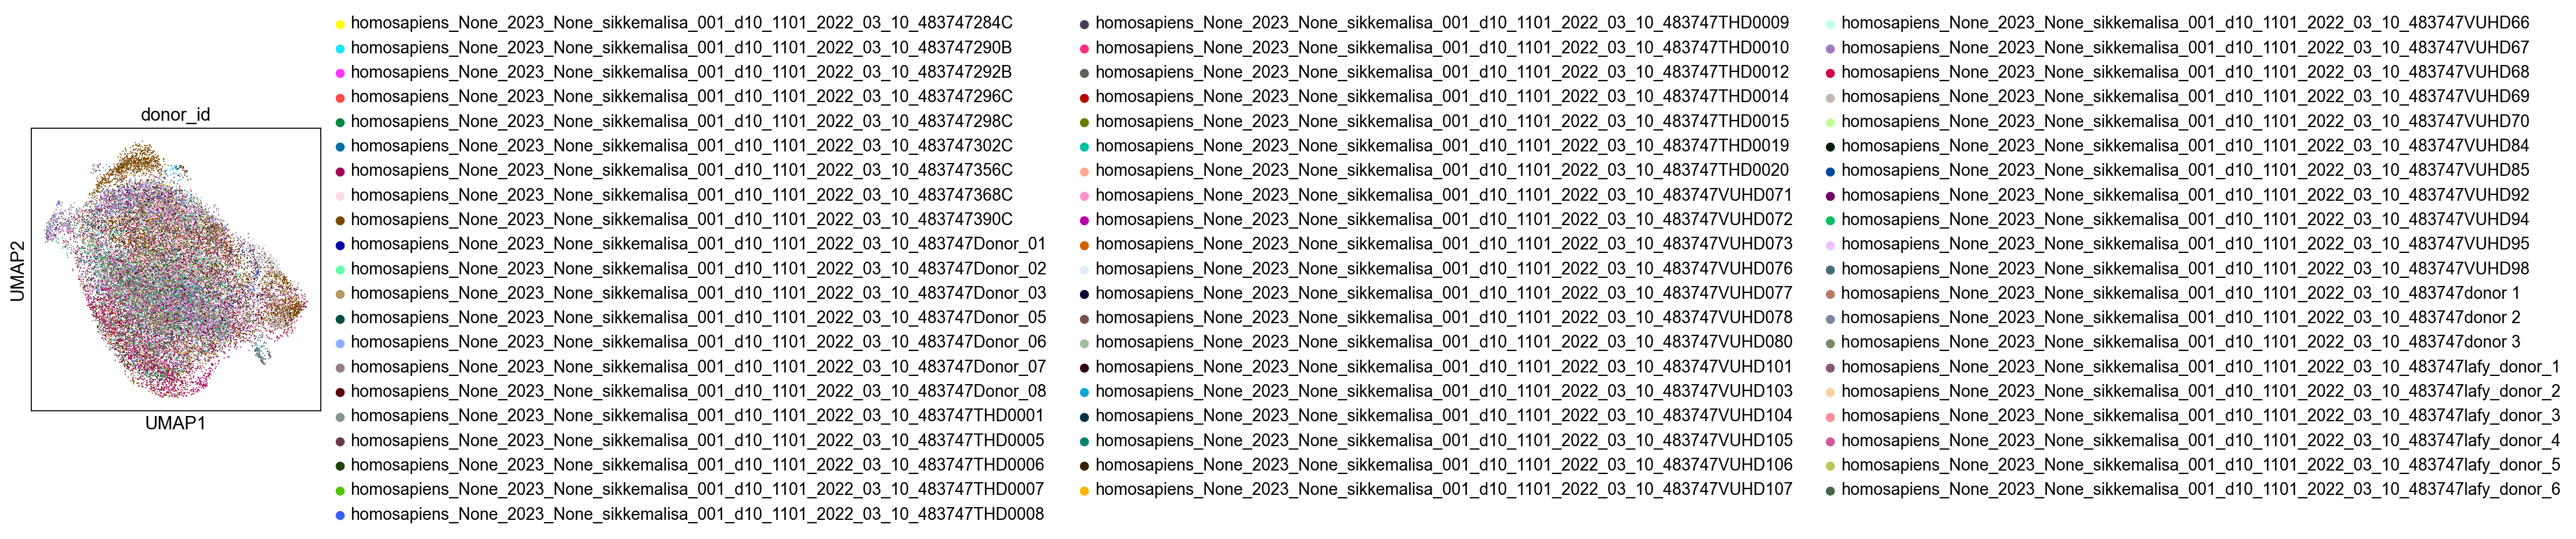

In [11]:
sc.pp.neighbors(adata_t_cellsNEW, use_rep='X_pca_harmony')
sc.tl.leiden(adata_t_cellsNEW, key_added='harmonycluster0.4lungonly31Jul1pm', resolution=0.4)

sc.tl.umap(adata_t_cellsNEW)
sc.pl.umap(adata_t_cellsNEW, color='donor_id')

# sc.pl.dotplot(adata_t_cellsNEW, marker_genes,  groupby='harmonycluster0.4lungonly31Jul1pm', gene_symbols='feature_name')
# sc.pl.heatmap(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul1pm', gene_symbols='feature_name', swap_axes=True)


In [15]:
sc.tl.rank_genes_groups(adata_t_cellsNEW, groupby='harmonycluster0.4lungonly31Jul1pm', method='wilcoxon')
resultRankings = adata_t_cellsNEW.uns['rank_genes_groups']

# Get the group names (clusters)
groups = resultRankings['names'].dtype.names

# Extracting the results into a dataframe
marker_genes_df = pd.DataFrame(
    {group + '_' + key: resultRankings[key][group]
    for group in groups for key in ['names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']}
)

# To write the DataFrame to a CSV file
marker_genes_df.to_csv('marker_genes.csv')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:22)


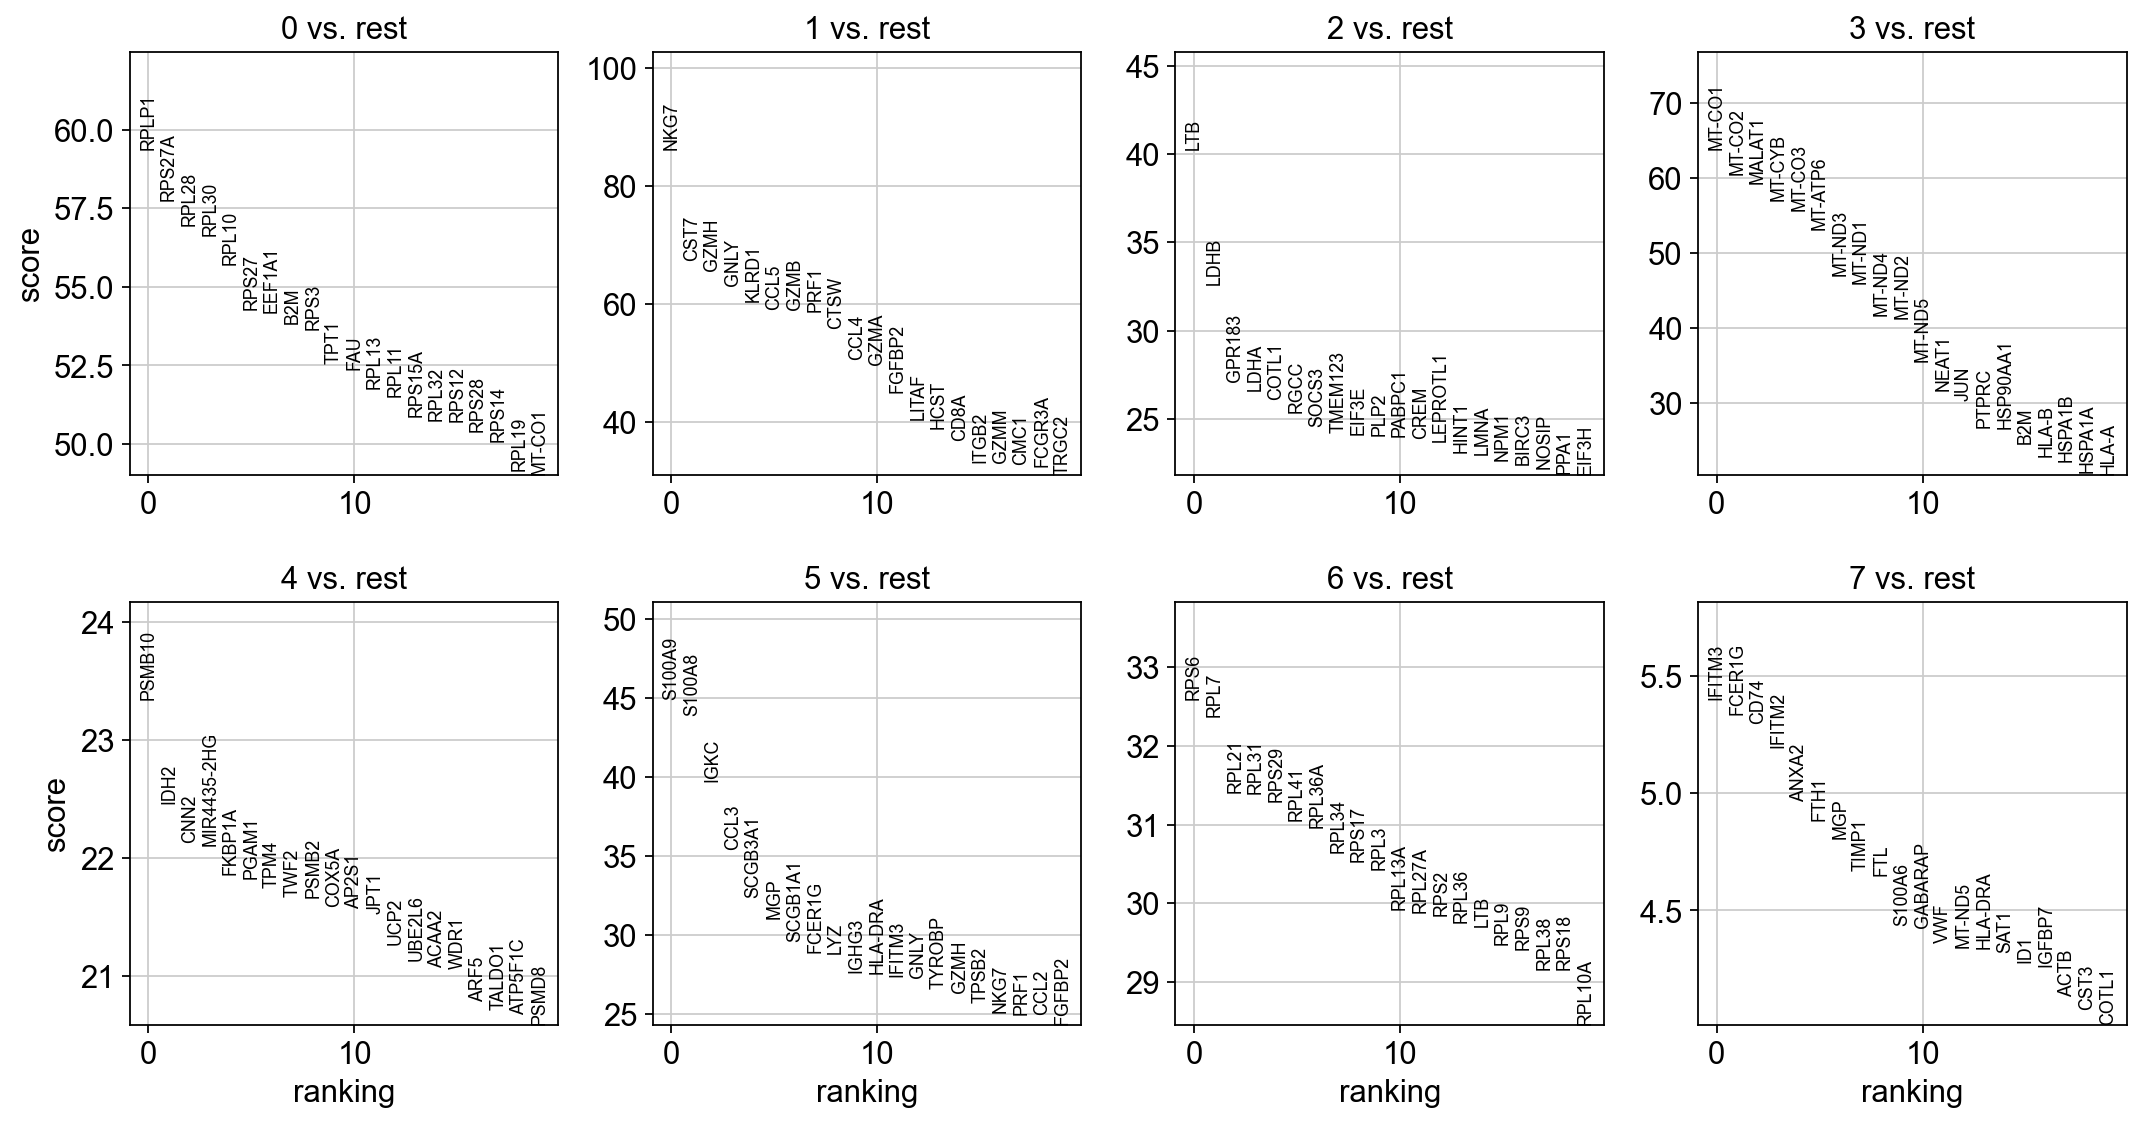

In [20]:
sc.pl.rank_genes_groups(adata_t_cellsNEW, gene_symbols='feature_name', n_genes=20, sharey=False)

In [18]:
print(adata_t_cellsNEW.var['feature_name'])

ensembl_id
ENSG00000000003           TSPAN6
ENSG00000000005             TNMD
ENSG00000000419             DPM1
ENSG00000000457            SCYL3
ENSG00000000460         C1orf112
                       ...      
ENSG00000283078     RP11-11M20.4
ENSG00000283103    LLNLR-245B6.1
ENSG00000283117          MGC4859
ENSG00000283118     RP11-107E5.4
ENSG00000283125     RP11-299P2.2
Name: feature_name, Length: 28024, dtype: object


In [39]:
print(adata_t_cellsNEW.obs['cell_type'].unique())

['CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'T cell']
Categories (3, object): ['T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell']


In [8]:
# Read the data from the CSV file
data = pd.read_csv('marker_genes.csv')

# Number of clusters
n_clusters = 8

# Process each cluster
for i in range(n_clusters):
    # Subset the DataFrame for the current cluster
    cluster_data = data[[f'{i}_names', f'{i}_scores', f'{i}_logfoldchanges', f'{i}_pvals', f'{i}_pvals_adj']]
    
    # Rename the columns
    cluster_data.columns = ['names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']
    
    # Filter the data for the current cluster based on conditions
    cluster_filtered = cluster_data[(cluster_data['pvals_adj'] < 0.05) & (cluster_data['logfoldchanges'] > 0.25)]
    
    # Rank genes in order of descending fold change
    cluster_filtered = cluster_filtered.sort_values(by='logfoldchanges', ascending=False)
    
    # Save the filtered and ranked data for the current cluster to a separate CSV file
    cluster_filtered.to_csv(f'cluster_{i}_filtered_ranked.csv', index=False)
    
    # Get the top 10 genes for the current cluster and save to a separate CSV file
    top_10_genes = cluster_filtered.head(10)
    top_10_genes.to_csv(f'cluster_{i}_top_10_genes.csv', index=False)



In [9]:
import scanpy as sc

# Create a list to store top genes from each cluster
top_genes = []

# Read top 10 genes from each cluster
for i in range(n_clusters):
    df = pd.read_csv(f'cluster_{i}_top_10_genes.csv')
    top_genes.extend(df['names'].tolist())

# Use only unique genes
top_genes = list(set(top_genes))

# Generate the heatmap
# sc.pl.heatmap(adata_t_cellsNEW, marker_genes, groupby='harmonycluster0.4lungonly31Jul1pm', gene_symbols='feature_name', swap_axes=True)


In [40]:
print(top_10_genes
      )

              names    scores  logfoldchanges         pvals  pvals_adj
11  ENSG00000110799  4.364119        8.789953  1.276363e-05   0.025023
15  ENSG00000125968  4.279456        6.100281  1.873504e-05   0.029168
6   ENSG00000111341  4.807399        5.969933  1.529069e-06   0.005356
16  ENSG00000163453  4.261973        5.886575  2.026297e-05   0.029887
1   ENSG00000158869  5.338129        5.574342  9.391025e-08   0.001081
0   ENSG00000142089  5.402092        5.518710  6.586839e-08   0.001081
7   ENSG00000102265  4.672486        3.908936  2.975761e-06   0.009266
10  ENSG00000170296  4.425685        3.704535  9.613679e-06   0.022451
13  ENSG00000204287  4.339414        3.480189  1.428634e-05   0.025023
4   ENSG00000182718  4.965587        3.177424  6.849375e-07   0.003839


In [41]:
print(len(top_genes))

50


In [10]:
sc.pl.heatmap(adata_t_cellsNEW, top_genes, groupby='harmonycluster0.4lungonly31Jul1pm', gene_symbols='feature_name', swap_axes=True, figsize=(20,25), show_gene_labels=True)

ValueError: groupby has to be a valid observation. Given harmonycluster0.4lungonly31Jul1pm, is not in observations: ['suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'reference_genome', 'sample', 'scanvi_label', 'sequencing_platform', 'size_factors', 'smoking_status', 'study', 'subject_type', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'harmonycluster0.4new', 'harmonycluster0.4lungonlyredo']

In [29]:
print(top_genes)

['ENSG00000115523', 'ENSG00000136997', 'ENSG00000134539', 'ENSG00000125968', 'ENSG00000138795', 'ENSG00000106952', 'ENSG00000111863', 'ENSG00000143153', 'ENSG00000154027', 'ENSG00000182463', 'ENSG00000137441', 'ENSG00000105374', 'ENSG00000180739', 'ENSG00000100453', 'ENSG00000172236', 'ENSG00000104918', 'ENSG00000118785', 'ENSG00000188404', 'ENSG00000134545', 'ENSG00000203747', 'ENSG00000172005', 'ENSG00000126353', 'ENSG00000232347', 'ENSG00000152253', 'ENSG00000165480', 'ENSG00000150045', 'ENSG00000060558', 'ENSG00000127564', 'ENSG00000157456', 'ENSG00000264745', 'ENSG00000090104', 'ENSG00000204287', 'ENSG00000147050', 'ENSG00000243716', 'ENSG00000213088', 'ENSG00000111341', 'ENSG00000168685', 'ENSG00000129173', 'ENSG00000197253', 'ENSG00000126787', 'ENSG00000237513', 'ENSG00000170128', 'ENSG00000130300', 'ENSG00000206560', 'ENSG00000132549', 'ENSG00000110799', 'ENSG00000163220', 'ENSG00000102265', 'ENSG00000250303', 'ENSG00000100450', 'ENSG00000101057', 'ENSG00000211897', 'ENSG000001

In [30]:
print(adata_t_cellsNEW.var['feature_name'])

ensembl_id
ENSG00000000003           TSPAN6
ENSG00000000005             TNMD
ENSG00000000419             DPM1
ENSG00000000457            SCYL3
ENSG00000000460         C1orf112
                       ...      
ENSG00000283078     RP11-11M20.4
ENSG00000283103    LLNLR-245B6.1
ENSG00000283117          MGC4859
ENSG00000283118     RP11-107E5.4
ENSG00000283125     RP11-299P2.2
Name: feature_name, Length: 28024, dtype: object


In [51]:
# Step 1: Manually generate the gene lists for each cluster
cluster_0_genes = ["GPR25", "DAPK2", "KLRC1", "ITGA1", "IL7R", "ANKRD28", "ATP1B1", "TNFSF8", "CXCR6", "RGS1"]
cluster_1_genes = ["FGFBP2", "NKG7", "GNLY", "GZMH", "KLRF1", "KLRD1", "FCGR3A", "S1PR5", "GZMB", "PRSS23"]
cluster_2_genes = ["MAL", "CCR7", "ADTRP", "AP002884.1", "GNA15", "TTC39C-AS1", "CMTM8", "PGAP1", "LTB", "TSHZ2"]
cluster_3_genes = ["AL390728.5", "KDM6A", "NPIPB5", "HSPA1B", "VPS13B", "PARP15", "AC007384.1", "NSF", "HSPA1A", "MACF1"]
cluster_4_genes = ["SPC25", "HJURP", "SKA3", "DIAPH3", "DLGAP5", "PKMYT1", "BIRC5", "E2F8", "MYBL2", "CCNB2"]
cluster_5_genes = ["SPP1", "IGHG3", "TPSAB1", "ACKR1", "PLVAP", "S100A9", "S100A8", "TPSB2", "RETN", "CCL2"]
cluster_6_genes =  ["ADTRP", "AK5", "TSHZ2", "SELL", "FHIT", "MAL", "CCR7", "LEF1", "LTB", "MYC"]
cluster_7_genes = ["VWF", "ID1", "MGP", "IGFBP7", "FCER1G", "IFITM3", "TIMP1", "GABARAP", "HLA-DRA", "ANXA2"]
# Repeat for other clusters

# Step 2 and 3: Add the gene list as a new column and save to updated CSV files
n_clusters = 8
for i in range(n_clusters):
    # Load the Top 10 genes for the current cluster
    top_10_genes = pd.read_csv(f'cluster_{i}_top_10_genes.csv')
    
    # Add the manually generated gene list as a new column "Gene Names"
    if i == 0:
        top_10_genes['Gene Names'] = cluster_0_genes
    elif i == 1:
        top_10_genes['Gene Names'] = cluster_1_genes
    elif i == 2:
        top_10_genes['Gene Names'] = cluster_2_genes
    elif i == 3:
        top_10_genes['Gene Names'] = cluster_3_genes
    elif i == 4:
        top_10_genes['Gene Names'] = cluster_4_genes
    elif i == 5:
        top_10_genes['Gene Names'] = cluster_5_genes
    elif i == 6:
        top_10_genes['Gene Names'] = cluster_6_genes 
    elif i == 7:
        top_10_genes['Gene Names'] = cluster_7_genes                      
    # Repeat for other clusters
    # ...
    # elif i == (n_clusters - 1):
    #     top_10_genes['Gene Names'] = cluster_(n_clusters - 1)_genes
    
    # Reorder columns to have "Gene Names" first
    top_10_genes = top_10_genes[['Gene Names', 'names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']]
    
    # Save the updated Top 10 genes data for the current cluster back to the CSV file
    top_10_genes.to_csv(f'cluster_{i}_top_10_genes.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


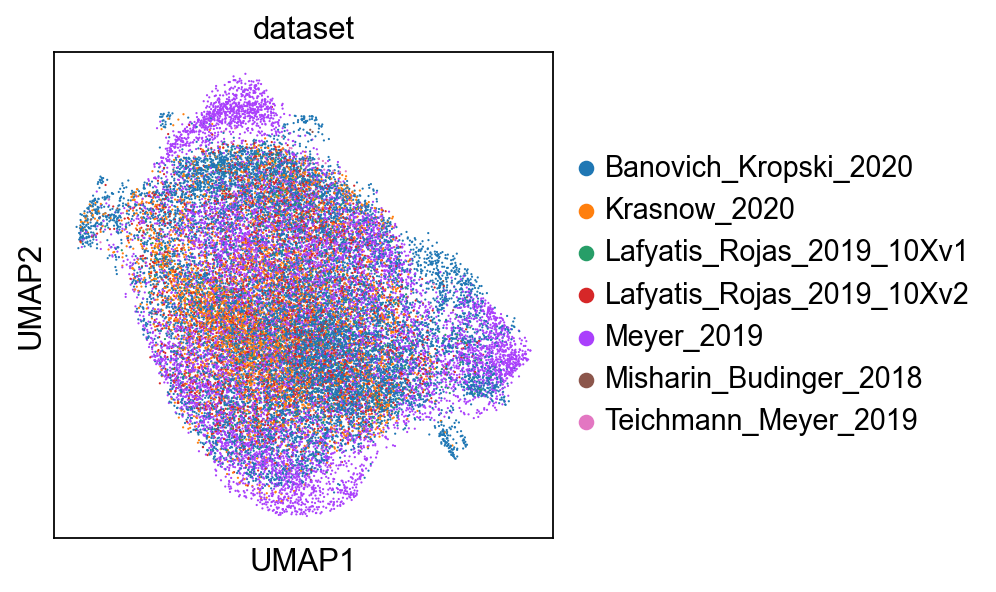

In [21]:
sc.pl.umap(adata_t_cellsNEW, color='dataset')

In [24]:
print(adata_subset)

NameError: name 'adata_subset' is not defined

In [29]:
print(adata_t_cellsNEW.X)

  (0, 3)	0.57612693
  (0, 22)	0.6075162
  (0, 27)	0.57612693
  (0, 70)	0.57612693
  (0, 100)	0.57612693
  (0, 102)	0.57612693
  (0, 106)	0.57612693
  (0, 180)	0.57612693
  (0, 192)	0.57612693
  (0, 195)	0.57612693
  (0, 220)	0.63013715
  (0, 227)	0.59769934
  (0, 248)	0.57612693
  (0, 278)	0.57612693
  (0, 326)	0.59769934
  (0, 328)	0.59769934
  (0, 342)	0.57612693
  (0, 354)	0.57612693
  (0, 375)	0.57612693
  (0, 389)	0.57612693
  (0, 400)	0.57612693
  (0, 410)	0.57612693
  (0, 447)	0.57612693
  (0, 457)	0.57612693
  (0, 468)	0.57612693
  :	:
  (30643, 22356)	0.5678475
  (30643, 22621)	0.5678475
  (30643, 22770)	0.604156
  (30643, 23032)	0.5678475
  (30643, 23144)	0.5678475
  (30643, 23225)	0.59289104
  (30643, 23267)	0.5678475
  (30643, 23371)	0.5678475
  (30643, 23463)	0.5678475
  (30643, 23527)	0.5678475
  (30643, 24959)	0.59289104
  (30643, 25106)	0.6193393
  (30643, 25117)	0.59289104
  (30643, 25149)	0.59289104
  (30643, 25183)	0.6221708
  (30643, 25462)	0.5678475
  (30643, 25878

In [33]:
# Convert the sparse matrix to a dense matrix
matrix_dense = adata_t_cellsNEW.X.todense()

# Create a DataFrame
df = pd.DataFrame(matrix_dense)

# Print the DataFrame
print(df)

       0      1      2         3      4      5      6      7      8      \
0        0.0    0.0    0.0  0.576127    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0  0.467837    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...       ...    ...    ...    ...    ...    ...   
30639    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
30640    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
30641    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
30642    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
30643    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   

       9      ...  28014  28015  28016  28017  28018  28019  28020  28021  \
0        0.0  ...    0

In [34]:
matrix_dense = adata.X.todense()

# Create a DataFrame
df = pd.DataFrame(matrix_dense, index=adata.var_names, columns=adata.obs_names)

# Filter DataFrame to include only rows and columns that contain non-zero values
df_nonzero = df.loc[(df!=0).any(axis=1), (df!=0).any(axis=0)]

# Print the DataFrame
print(df_nonzero)

KeyboardInterrupt: 